2048.0
4096.0


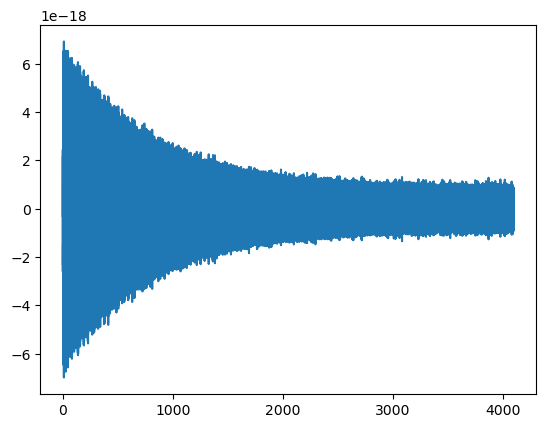

In [12]:
from pycbc.frame import read_frame
import matplotlib.pyplot as plt

data = read_frame('/Users/ngalanis/Documents/GW_Data_Workshop/challenge3-2048.gwf', 'H1:CHALLENGE3')

print(data.sample_rate)
print(data.duration)

plt.plot(data.sample_times, data)
plt.show()

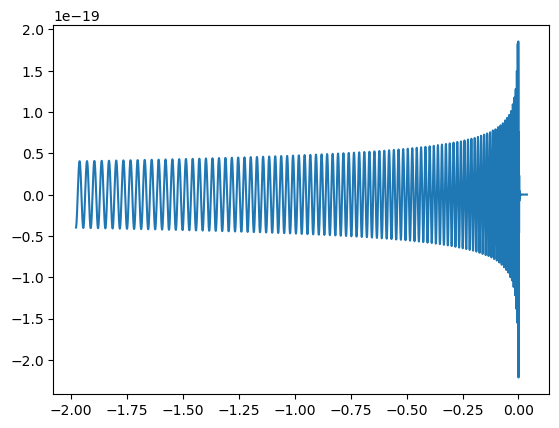

In [20]:
from pycbc.waveform import get_td_waveform

hp, _ = get_td_waveform(approximant='SEOBNRv4_opt', mass1=10, mass2=10, delta_t=data.delta_t, f_lower=30)
plt.plot(hp.sample_times, hp)
plt.show()

hp.resize(len(data))

(20, 1024)

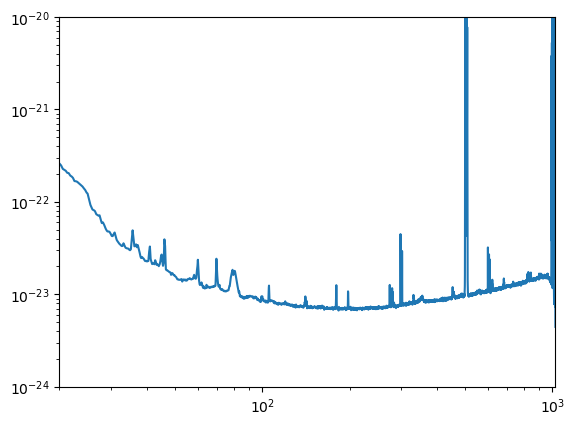

In [31]:
from pycbc.psd import interpolate

psd = data.psd(4)**0.5
psd = interpolate(psd, data.delta_f)


plt.plot(psd.sample_frequencies, psd)
plt.yscale('log')
plt.xscale('log')
plt.ylim([1e-24,1e-20])
plt.xlim([20, 1024])

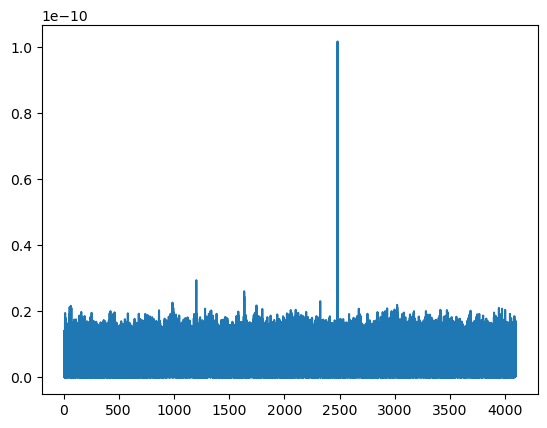

In [25]:
from pycbc.filter import matched_filter

snr = matched_filter(hp, data, psd=psd, low_frequency_cutoff=30)

snr = snr.crop(8,4)

plt.plot(snr.sample_times, abs(snr))
plt.show()

In [26]:
import numpy as np

s = np.array(snr)

print(abs(s).max()/s.std())

17.786786755037504


In [27]:
idx = abs(s).argmax()
snr.sample_times[idx]-hp.sample_times[0]

2483.96725355575